In [109]:
import yfinance as yf

In [110]:
df = yf.download('AAPL', start="2010-01-01")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800
...,...,...,...,...,...,...
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500
2024-04-03,168.789993,170.679993,168.580002,169.649994,169.649994,47691700


In [111]:
df = df[['Close']].reset_index()
df.columns = ['ds', 'y']
df

,ds,y
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714
...,...,...
3583,2024-04-01,170.029999
3584,2024-04-02,168.839996
3585,2024-04-03,169.649994
3586,2024-04-04,168.820007


In [112]:
from prophet import Prophet
from datetime import date

train_ratio = 0.8
split = int(len(df) * train_ratio)
df_train = df[:split]
df_test = df[split:]

model = Prophet(daily_seasonality=True)

model.fit(df_train)

num_days = (date.today() - df_train.iloc[-1]['ds'].date()).days

future = model.make_future_dataframe(num_days)
forecast = model.predict(future)

14:32:05 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing


In [113]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,7.521899,2.304395,12.983754,7.521899,7.521899,0.406092,0.406092,0.406092,-0.163395,-0.163395,-0.163395,-0.007244,-0.007244,-0.007244,0.576731,0.576731,0.576731,0.0,0.0,0.0,7.927991
1,2010-01-05,7.532926,2.419066,12.752526,7.532926,7.532926,0.424226,0.424226,0.424226,-0.163395,-0.163395,-0.163395,0.022995,0.022995,0.022995,0.564626,0.564626,0.564626,0.0,0.0,0.0,7.957152
2,2010-01-06,7.543953,2.366294,13.374785,7.543953,7.543953,0.428236,0.428236,0.428236,-0.163395,-0.163395,-0.163395,0.037841,0.037841,0.037841,0.553790,0.553790,0.553790,0.0,0.0,0.0,7.972189
3,2010-01-07,7.554980,2.459300,13.403388,7.554980,7.554980,0.377143,0.377143,0.377143,-0.163395,-0.163395,-0.163395,-0.004134,-0.004134,-0.004134,0.544672,0.544672,0.544672,0.0,0.0,0.0,7.932123
4,2010-01-08,7.566007,2.464279,12.977786,7.566007,7.566007,0.283987,0.283987,0.283987,-0.163395,-0.163395,-0.163395,-0.090306,-0.090306,-0.090306,0.537688,0.537688,0.537688,0.0,0.0,0.0,7.849994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,2024-04-04,264.353667,197.663611,327.019697,198.350925,329.552766,-1.520829,-1.520829,-1.520829,-0.163395,-0.163395,-0.163395,-0.004134,-0.004134,-0.004134,-1.353300,-1.353300,-1.353300,0.0,0.0,0.0,262.832838
3913,2024-04-05,264.476023,199.048822,325.815795,198.383425,329.803032,-1.553578,-1.553578,-1.553578,-0.163395,-0.163395,-0.163395,-0.090306,-0.090306,-0.090306,-1.299877,-1.299877,-1.299877,0.0,0.0,0.0,262.922444
3914,2024-04-06,264.598379,198.158966,327.929854,198.415924,330.052646,-1.388302,-1.388302,-1.388302,-0.163395,-0.163395,-0.163395,0.020424,0.020424,0.020424,-1.245331,-1.245331,-1.245331,0.0,0.0,0.0,263.210077
3915,2024-04-07,264.720735,198.445925,328.548852,198.449251,330.296774,-1.333260,-1.333260,-1.333260,-0.163395,-0.163395,-0.163395,0.020424,0.020424,0.020424,-1.190290,-1.190290,-1.190290,0.0,0.0,0.0,263.387474


c:\Users\j584l\Downloads\Projects\stock-price-forecasting\env1\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\j584l\Downloads\Projects\stock-price-forecasting\env1\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


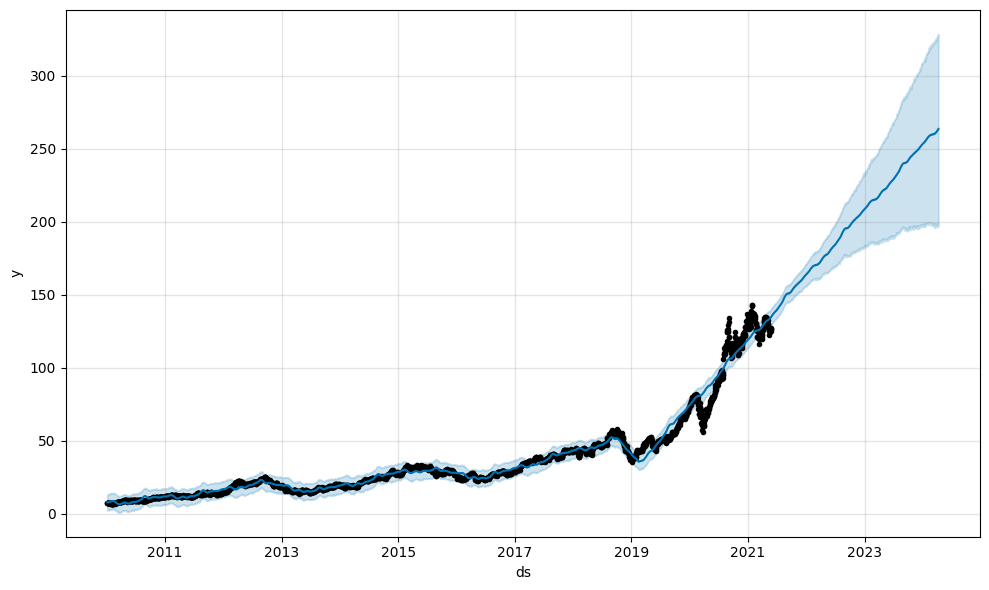

In [114]:
import matplotlib.pyplot as plt

model.plot(forecast)

plt.show()

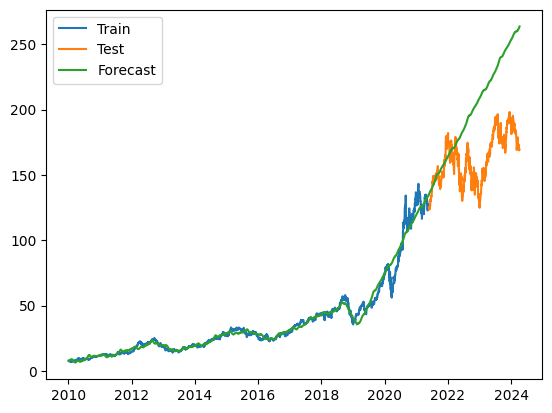

In [115]:
fig = plt.figure()

plt.plot(df_train['ds'], df_train['y'], label='Train')
plt.plot(df_test['ds'], df_test['y'], label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')

plt.legend()